In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# For better visualization
plt.style.use('ggplot')
sns.set(style="whitegrid")
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Load the dataset
try:
    data = pd.read_excel("AgencyDataset.xlsx")
    print(f"Dataset loaded successfully with {data.shape[0]} rows and {data.shape[1]} columns.")
except Exception as e:
    print(f"Error loading dataset: {e}")
    # If dataset can't be loaded, we'd need to handle the error appropriately

# Display the first few rows
print("\nFirst few rows of the dataset:")
data.head()










































Dataset loaded successfully with 4600 rows and 18 columns.

First few rows of the dataset:


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [2]:
## 2. Data Exploration

### 2.1 Basic Information


# Basic information about the dataset
print("\nBasic information about the dataset:")
print(f"Shape: {data.shape}")
print("\nColumn types:")
print(data.dtypes)

# Summary statistics
print("\nSummary statistics for numerical columns:")
print(data.describe())

# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

# Check for duplicates
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Basic information about the dataset:
Shape: (4600, 18)

Column types:
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
street                   object
city                     object
statezip                 object
country                  object
dtype: object

Summary statistics for numerical columns:
                                date         price     bedrooms    bathrooms  \
count                           4600  4.600000e+03  4600.000000  4600.000000   
mean   2014-06-07 03:14:42.782608640  5.519630e+05     3.400870     2.160815   
min              2014-05-02 00:00:00  0.000000e+00     0

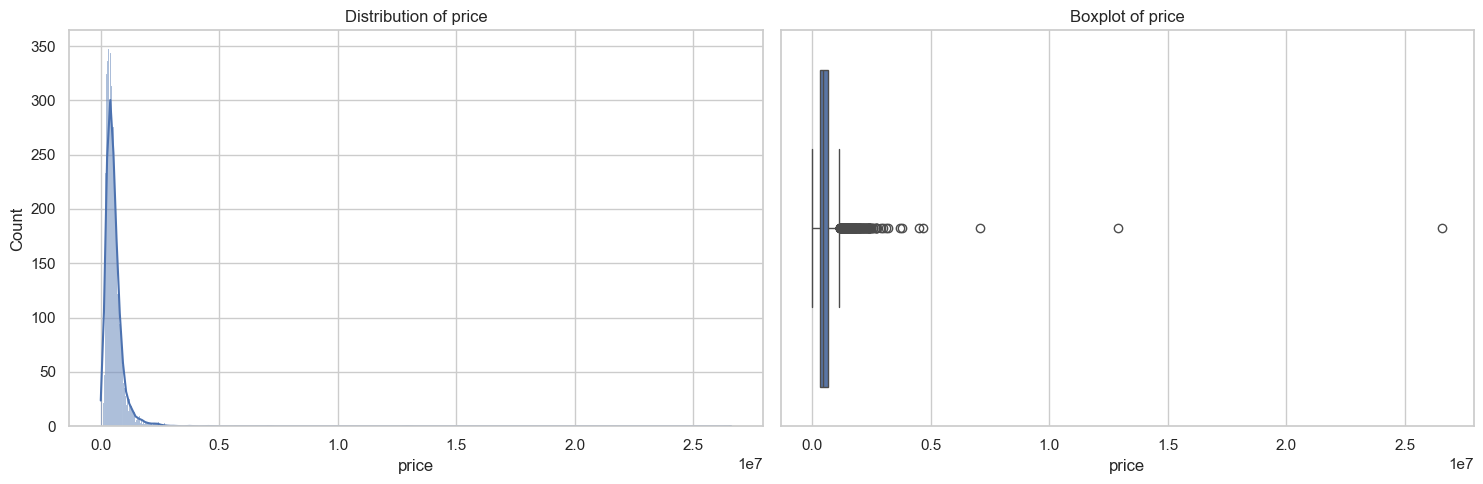


Summary statistics for price:
count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64
Number of outliers in price: 240
Outlier values range from 1157200.0 to 26590000.0
--------------------------------------------------


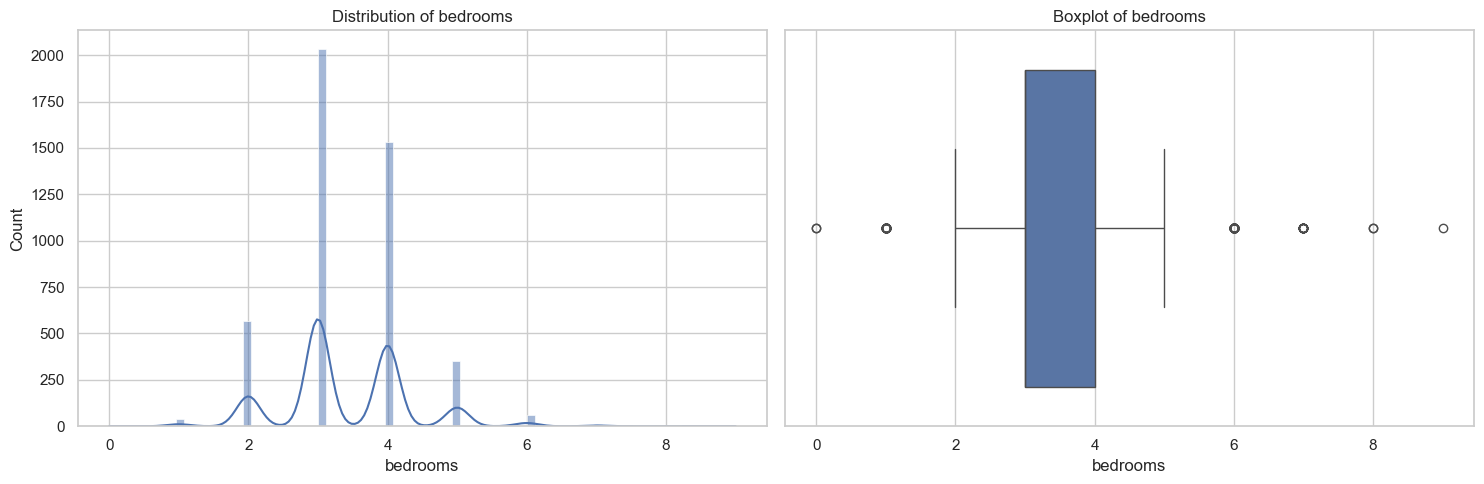


Summary statistics for bedrooms:
count    4600.000000
mean        3.400870
std         0.908848
min         0.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: bedrooms, dtype: float64
Number of outliers in bedrooms: 118
Outlier values range from 0 to 9
--------------------------------------------------


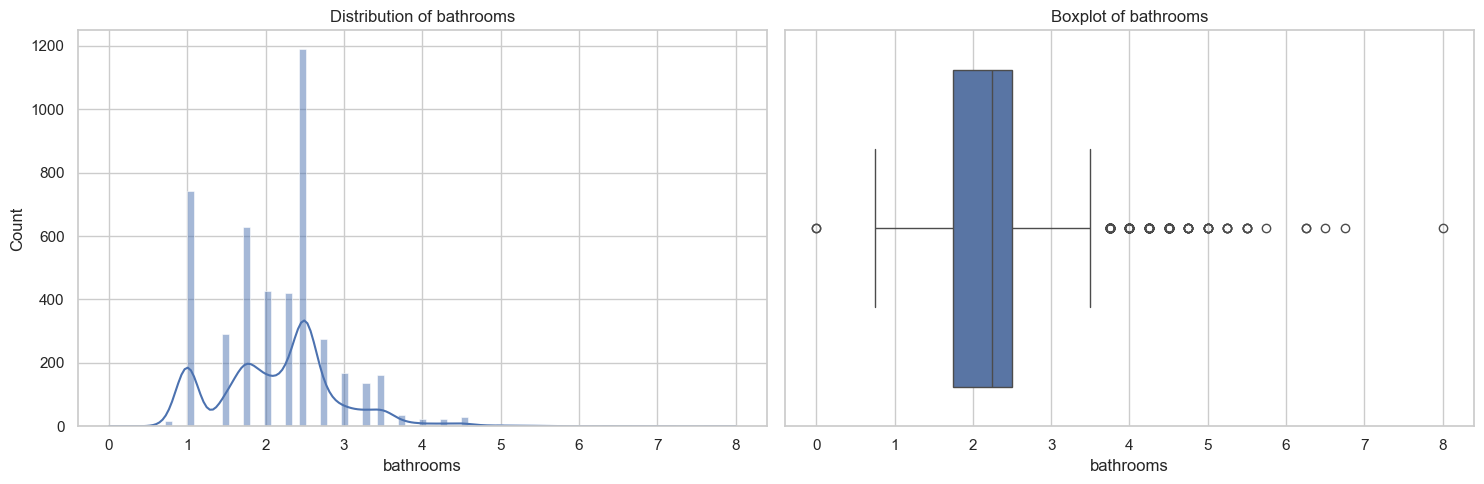


Summary statistics for bathrooms:
count    4600.000000
mean        2.160815
std         0.783781
min         0.000000
25%         1.750000
50%         2.250000
75%         2.500000
max         8.000000
Name: bathrooms, dtype: float64
Number of outliers in bathrooms: 141
Outlier values range from 0.0 to 8.0
--------------------------------------------------


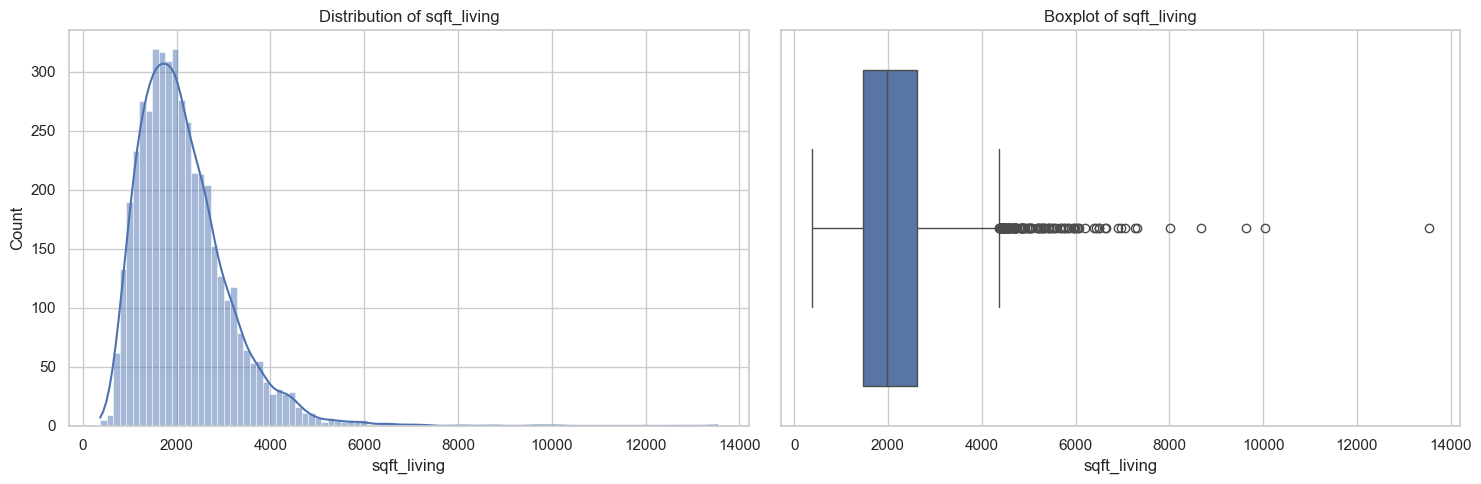


Summary statistics for sqft_living:
count     4600.000000
mean      2139.346957
std        963.206916
min        370.000000
25%       1460.000000
50%       1980.000000
75%       2620.000000
max      13540.000000
Name: sqft_living, dtype: float64
Number of outliers in sqft_living: 129
Outlier values range from 4370 to 13540
--------------------------------------------------


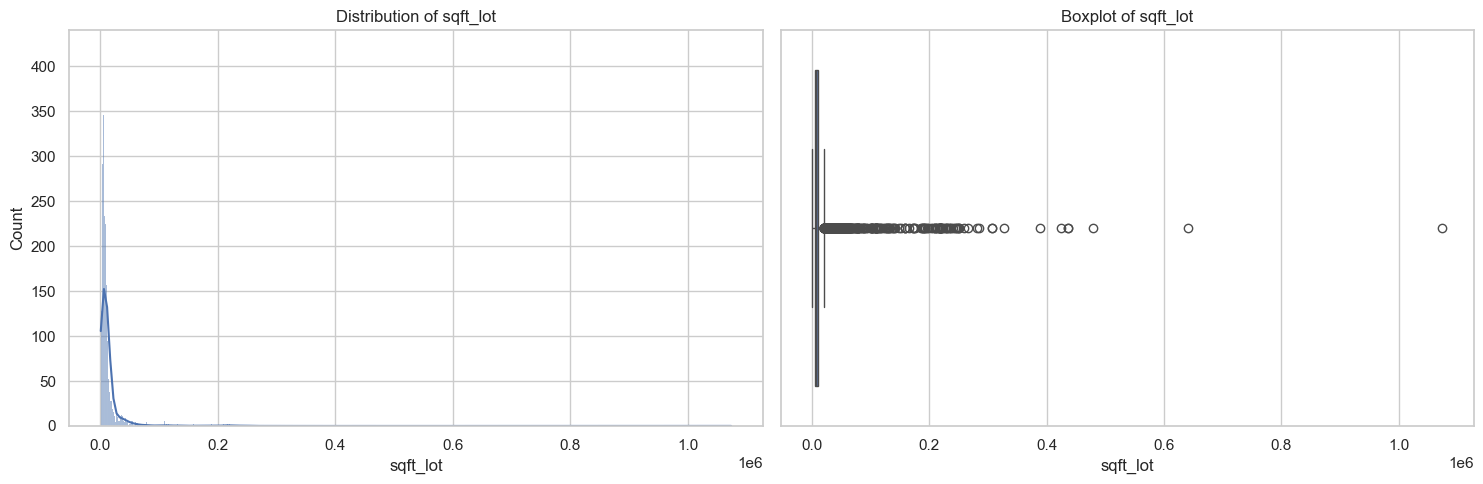


Summary statistics for sqft_lot:
count    4.600000e+03
mean     1.485252e+04
std      3.588444e+04
min      6.380000e+02
25%      5.000750e+03
50%      7.683000e+03
75%      1.100125e+04
max      1.074218e+06
Name: sqft_lot, dtype: float64
Number of outliers in sqft_lot: 541
Outlier values range from 20011 to 1074218
--------------------------------------------------


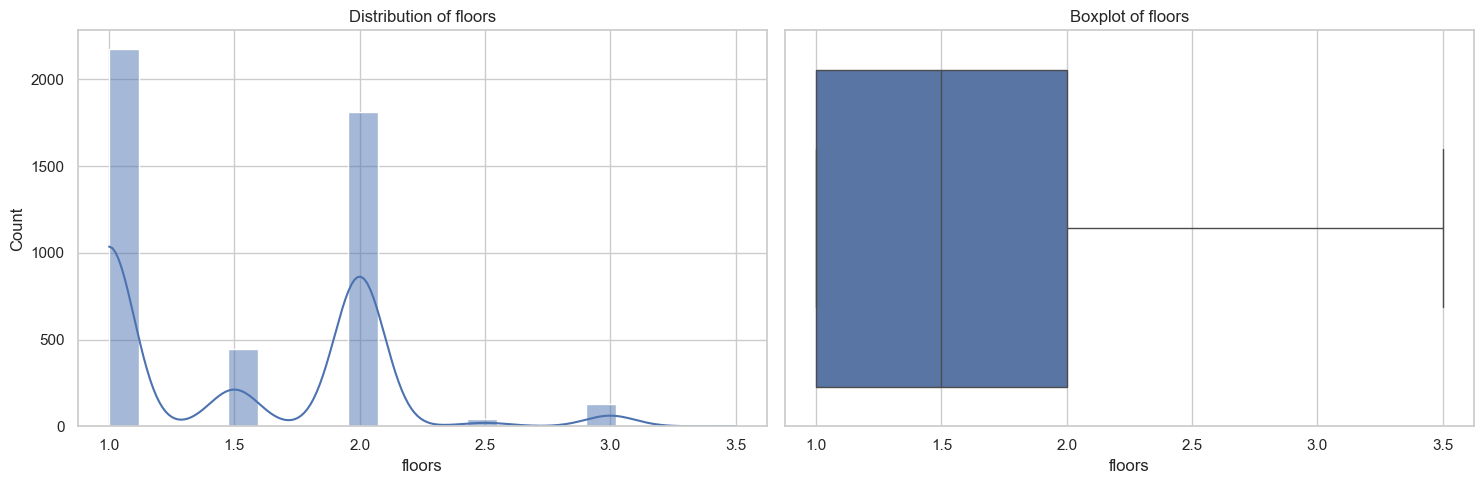


Summary statistics for floors:
count    4600.000000
mean        1.512065
std         0.538288
min         1.000000
25%         1.000000
50%         1.500000
75%         2.000000
max         3.500000
Name: floors, dtype: float64
Number of outliers in floors: 0
--------------------------------------------------


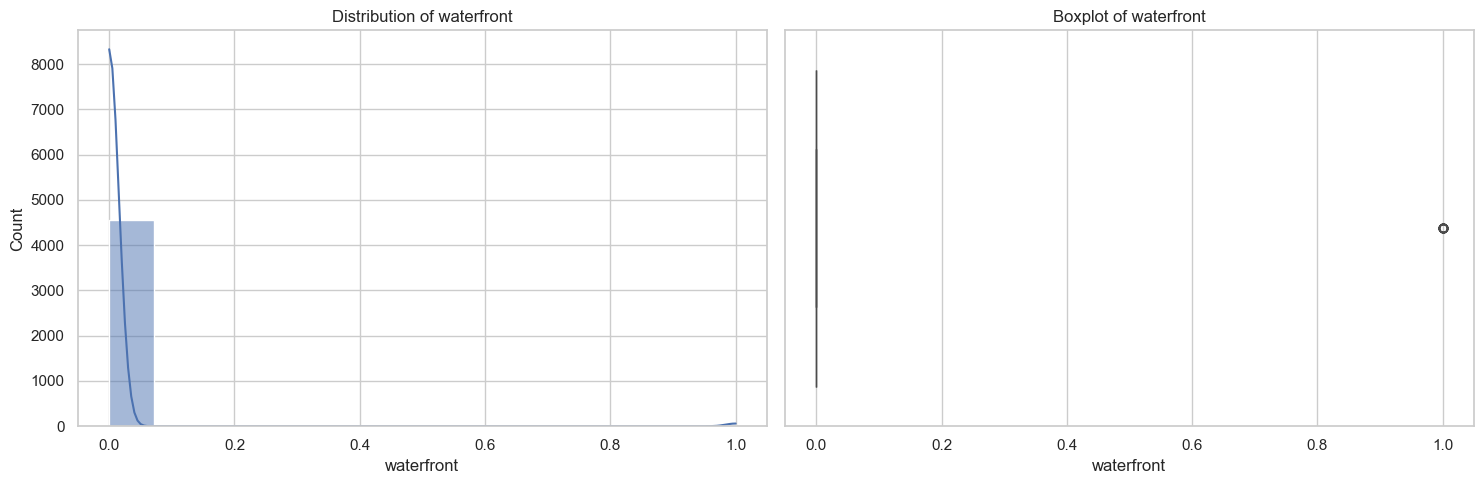


Summary statistics for waterfront:
count    4600.000000
mean        0.007174
std         0.084404
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: waterfront, dtype: float64
Number of outliers in waterfront: 33
Outlier values range from 1 to 1
--------------------------------------------------


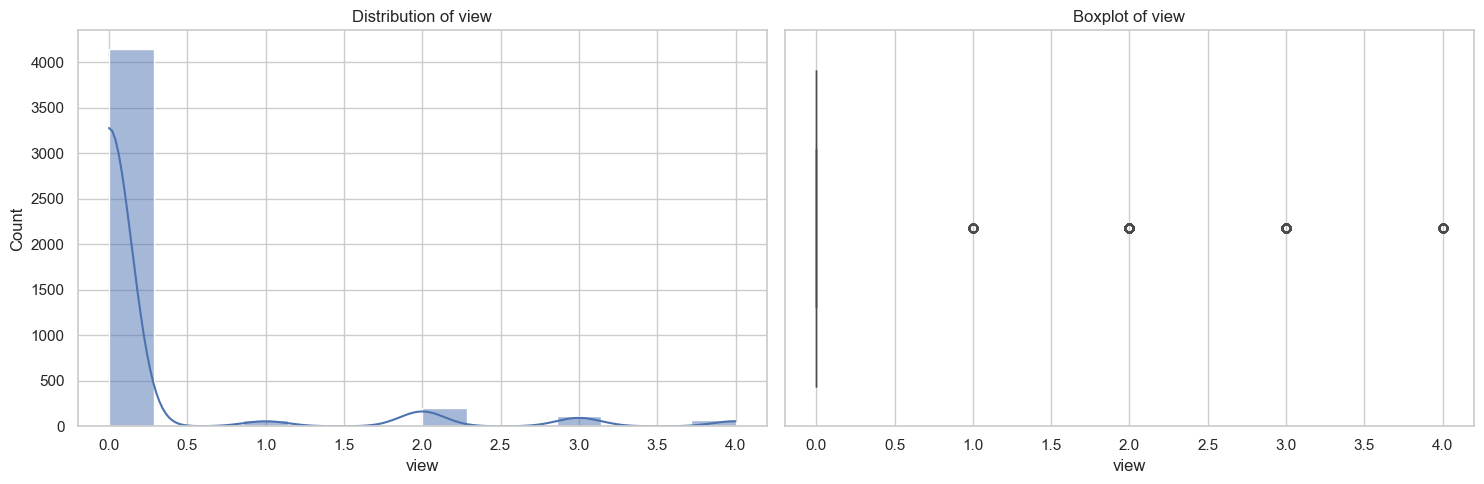


Summary statistics for view:
count    4600.000000
mean        0.240652
std         0.778405
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: view, dtype: float64
Number of outliers in view: 460
Outlier values range from 1 to 4
--------------------------------------------------


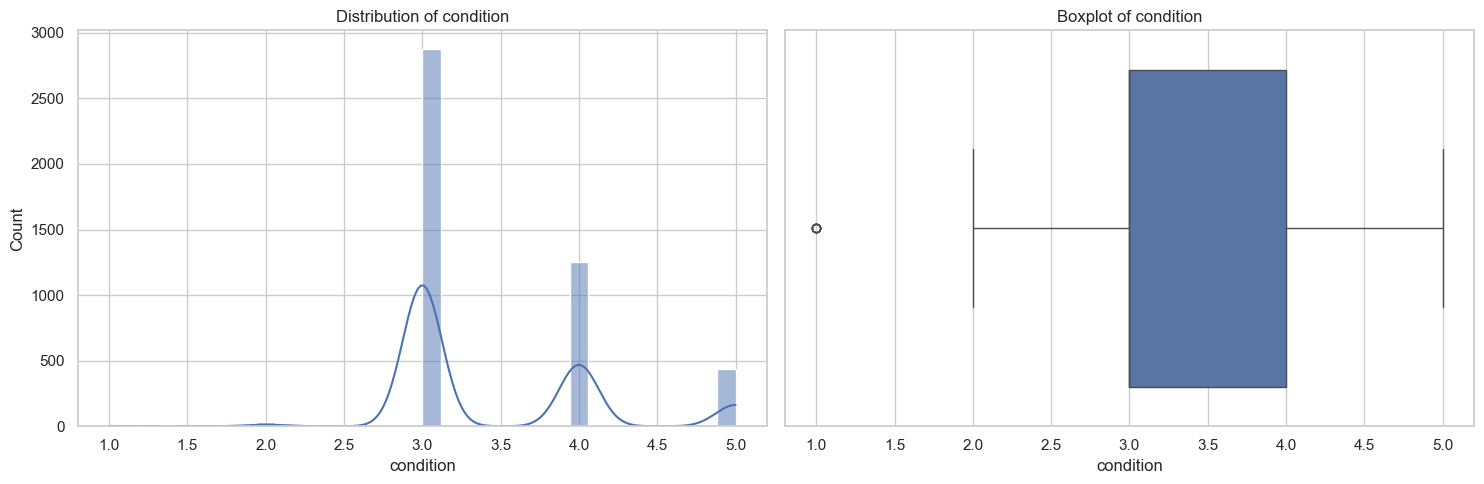


Summary statistics for condition:
count    4600.000000
mean        3.451739
std         0.677230
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: condition, dtype: float64
Number of outliers in condition: 6
Outlier values range from 1 to 1
--------------------------------------------------


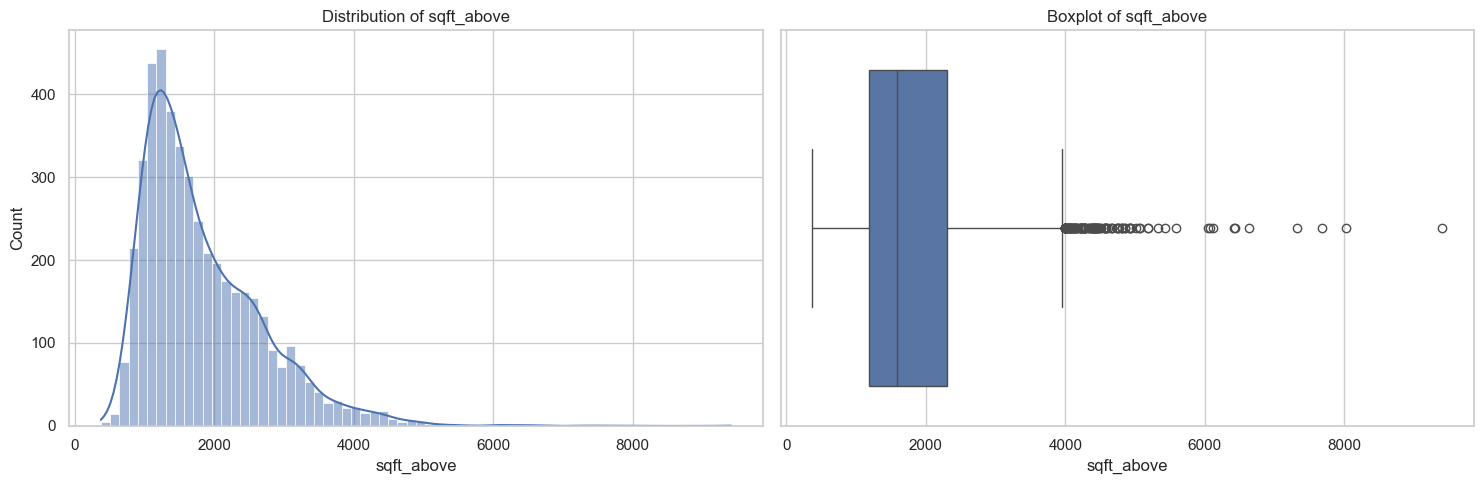


Summary statistics for sqft_above:
count    4600.000000
mean     1827.265435
std       862.168977
min       370.000000
25%      1190.000000
50%      1590.000000
75%      2300.000000
max      9410.000000
Name: sqft_above, dtype: float64
Number of outliers in sqft_above: 116
Outlier values range from 3990 to 9410
--------------------------------------------------


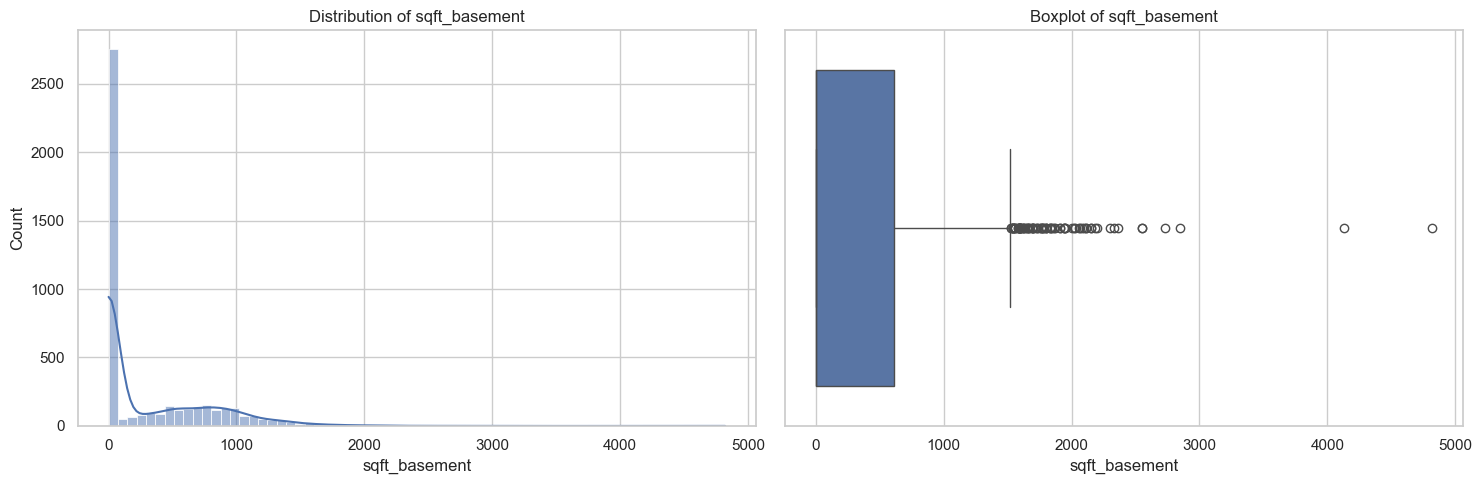


Summary statistics for sqft_basement:
count    4600.000000
mean      312.081522
std       464.137228
min         0.000000
25%         0.000000
50%         0.000000
75%       610.000000
max      4820.000000
Name: sqft_basement, dtype: float64
Number of outliers in sqft_basement: 82
Outlier values range from 1530 to 4820
--------------------------------------------------


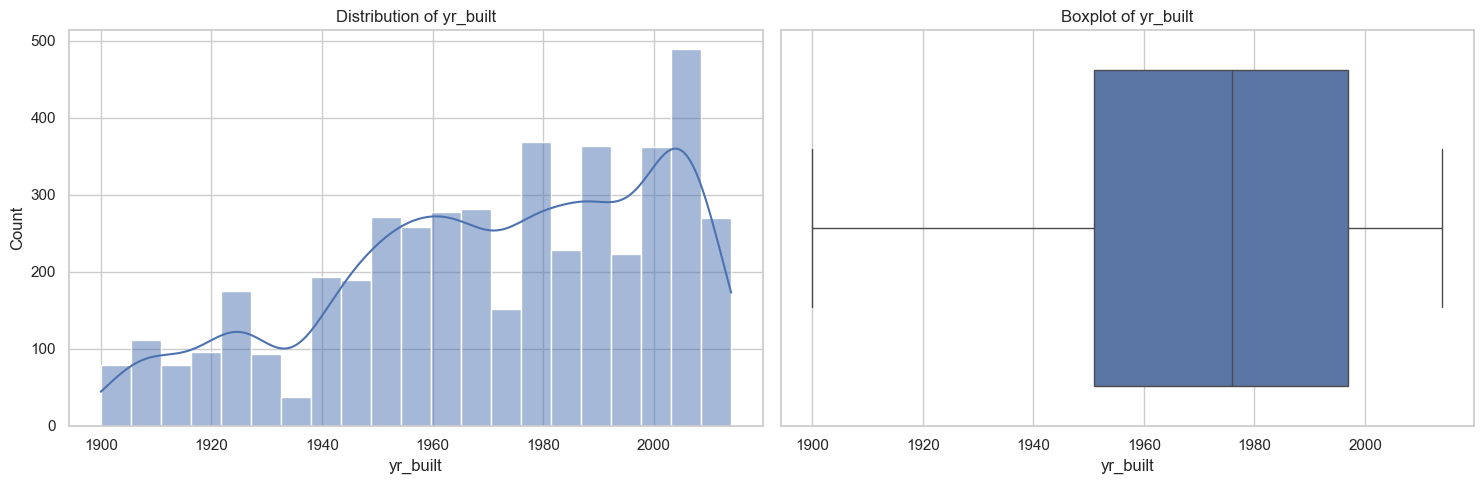


Summary statistics for yr_built:
count    4600.000000
mean     1970.786304
std        29.731848
min      1900.000000
25%      1951.000000
50%      1976.000000
75%      1997.000000
max      2014.000000
Name: yr_built, dtype: float64
Number of outliers in yr_built: 0
--------------------------------------------------


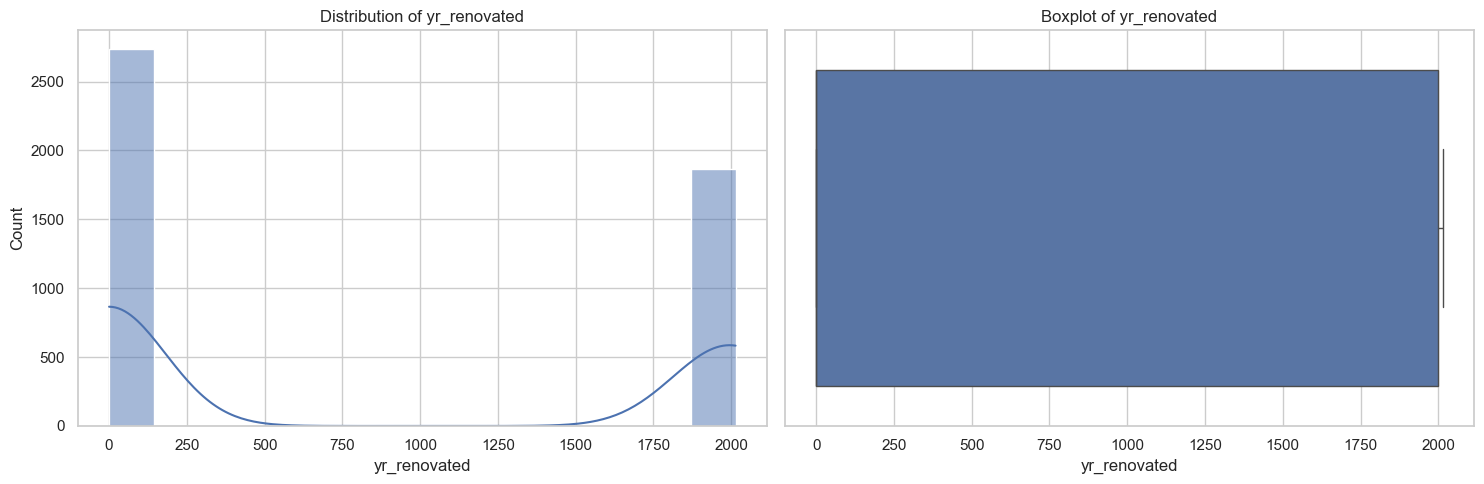


Summary statistics for yr_renovated:
count    4600.000000
mean      808.608261
std       979.414536
min         0.000000
25%         0.000000
50%         0.000000
75%      1999.000000
max      2014.000000
Name: yr_renovated, dtype: float64
Number of outliers in yr_renovated: 0
--------------------------------------------------


In [3]:
### 2.2 Visualizing Numeric Features


# Get numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
exclude_cols = ['Year built', 'Year renovated']  # Years are special cases
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

# Analyze each numeric feature
for col in numeric_cols:
    plt.figure(figsize=(15, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\nSummary statistics for {col}:")
    print(data[col].describe())
    
    # Check for outliers using IQR method
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
    print(f"Number of outliers in {col}: {len(outliers)}")
    if len(outliers) > 0:
        print(f"Outlier values range from {outliers.min()} to {outliers.max()}")
    print("-" * 50)


Top 20 categories for street:
street
1 View Ln NE                  1
10 W Etruria St               1
100 20th Ave E                1
100 24th Ave E                1
100 Mt Si Pl NW               1
1000 Mountain View Blvd SE    1
10000-10026 S 100th St        1
10005 16th Ave S              1
10009 SE 247th Pl             1
1001 SW 102nd St              1
1001 Whitman Ct NE            1
10010 37th Ave SW             1
10010 44th Ave SW             1
10012 SE 244th Ct             1
1002 Pike St NE               1
10020 18th Ave SW             1
10022 19th Ave SW             1
10022 NE 110th St             1
10025-10037 31st Ave SW       1
10026 61st Ave S              1
Name: count, dtype: int64
Number of unique values in street: 4525
--------------------------------------------------

Top 20 categories for city:
city
Algona                   5
Auburn                 176
Beaux Arts Village       1
Bellevue               286
Black Diamond            9
Bothell                 33
Burien   

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

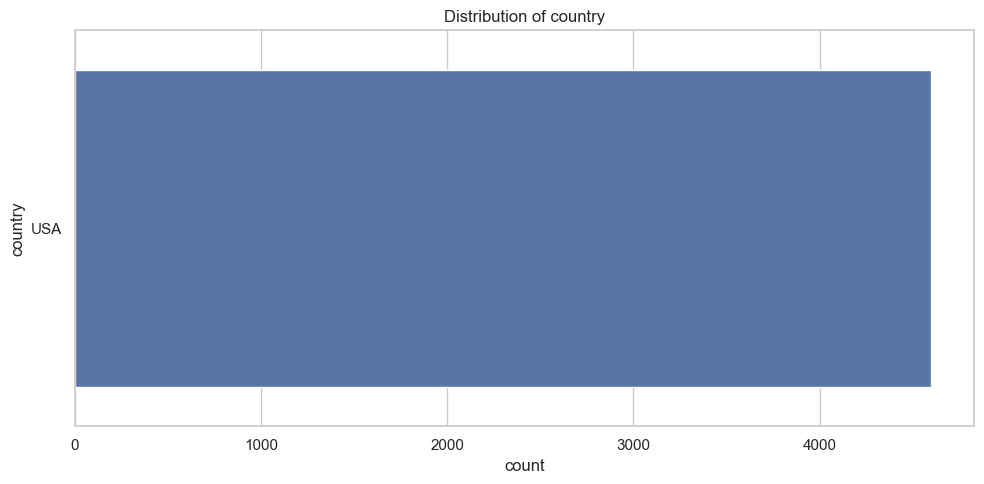


Value counts for country:
country
USA    4600
Name: count, dtype: int64
Number of unique values in country: 1
--------------------------------------------------


<Figure size 1000x500 with 0 Axes>

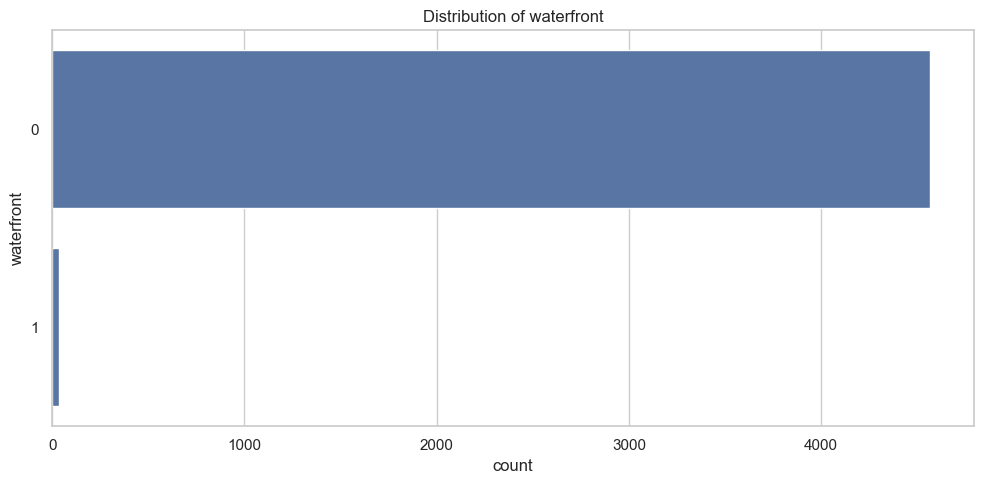


Value counts for waterfront:
waterfront
0    4567
1      33
Name: count, dtype: int64
Number of unique values in waterfront: 2
--------------------------------------------------


<Figure size 1000x500 with 0 Axes>

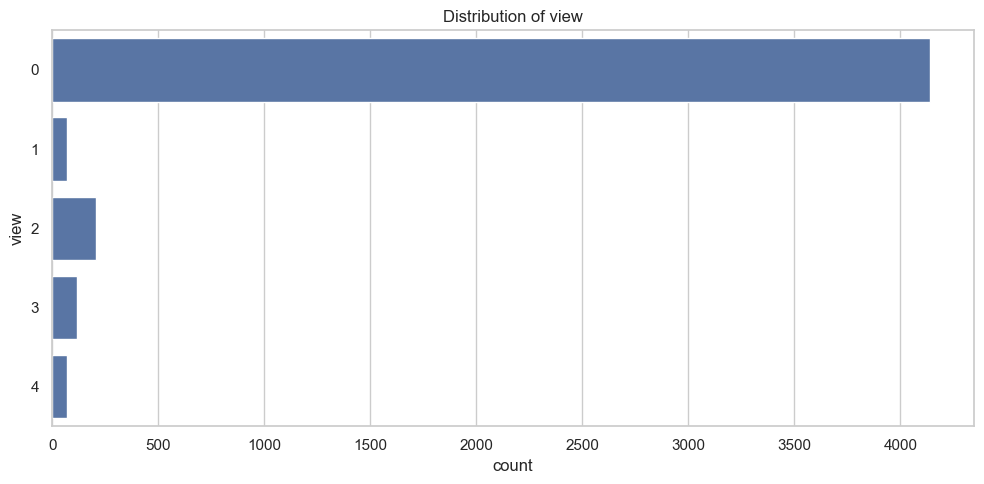


Value counts for view:
view
0    4140
1      69
2     205
3     116
4      70
Name: count, dtype: int64
Number of unique values in view: 5
--------------------------------------------------


<Figure size 1000x500 with 0 Axes>

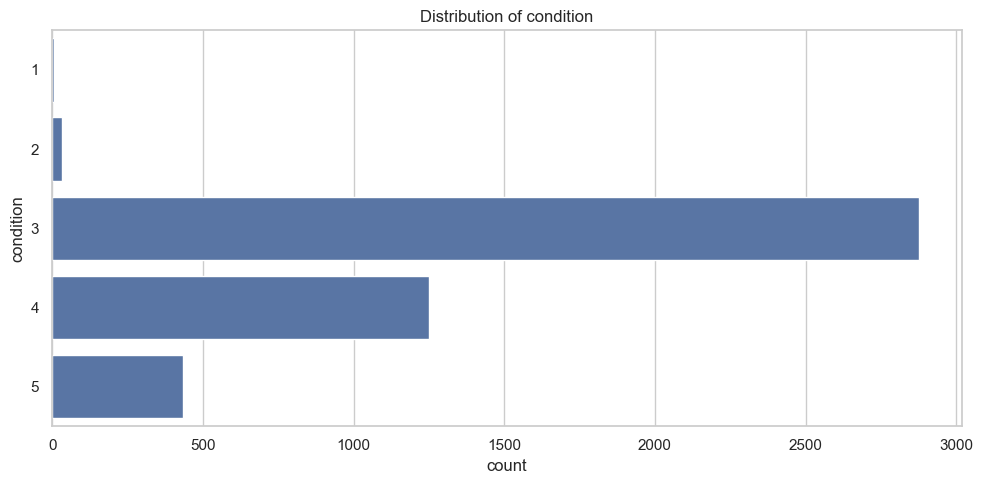


Value counts for condition:
condition
1       6
2      32
3    2875
4    1252
5     435
Name: count, dtype: int64
Number of unique values in condition: 5
--------------------------------------------------


In [4]:
### 2.3 Visualizing Categorical Features

# Get categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
categorical_cols.extend(['waterfront', 'view', 'condition'])  # Include columns that are categorical but might be stored as numbers

# Analyze each categorical feature
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    value_counts = data[col].value_counts().sort_index()
    
    # If there are too many unique values, only print the top 20
    if len(value_counts) > 20:
        print(f"\nTop 20 categories for {col}:")
        print(value_counts.head(20))
    else:
        plt.figure(figsize=(10, 5))
        sns.countplot(y=data[col])
        plt.title(f'Distribution of {col}')
        plt.tight_layout()
        plt.show()
        
        print(f"\nValue counts for {col}:")
        print(value_counts)
    
    print(f"Number of unique values in {col}: {data[col].nunique()}")
    print("-" * 50)

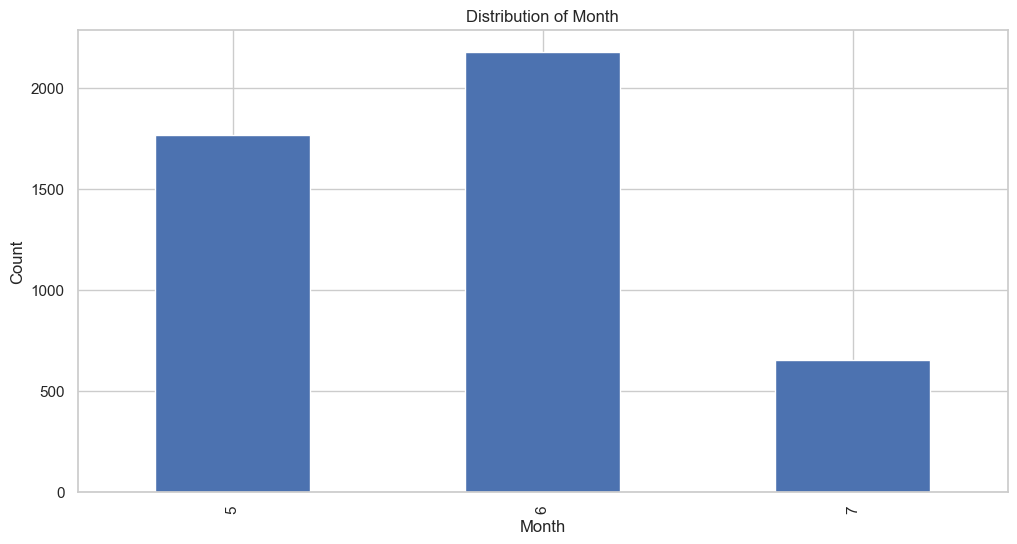


Date range: 2014-05-02 00:00:00 to 2014-07-10 00:00:00
Missing dates: 0


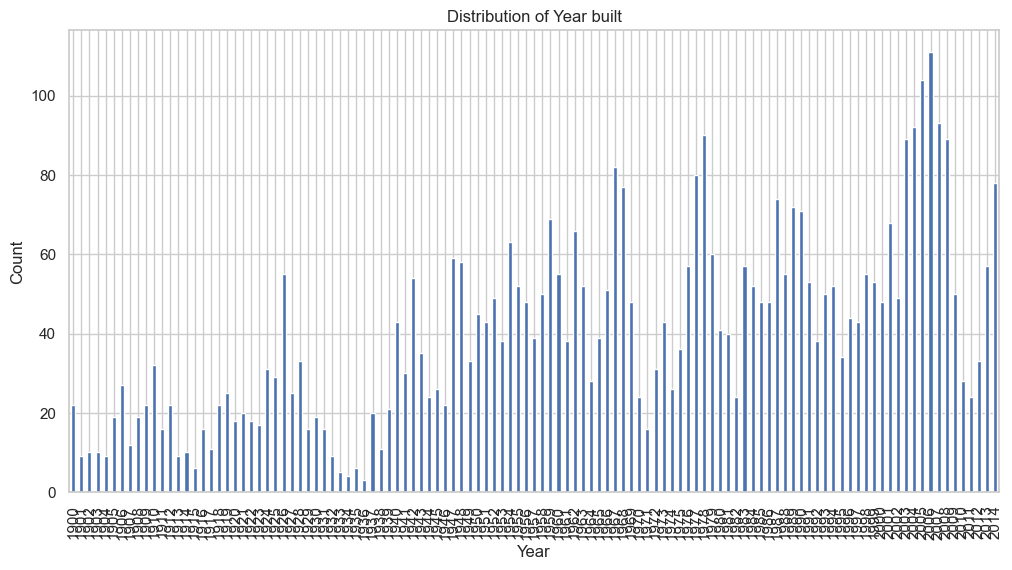


Earliest Year built: 1900
Latest Year built: 2014
Missing values: 0

Houses not renovated (yr_renovated = 0): 2735


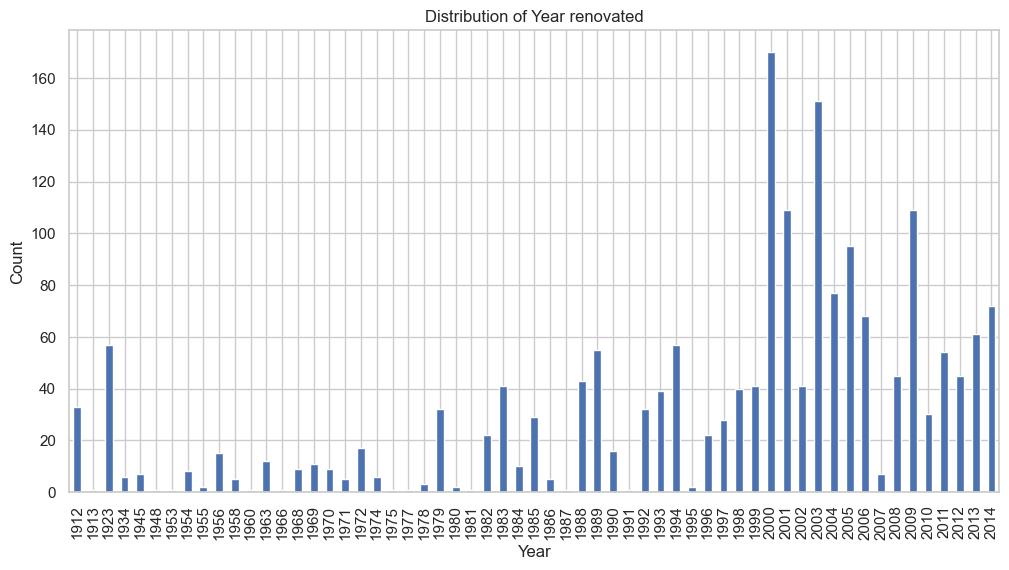


Earliest Year renovated: 0
Latest Year renovated: 2014
Missing values: 0


In [5]:

### 2.4 Analyzing Date and Year Features


# Date analysis
if 'date' in data.columns:
    plt.figure(figsize=(12, 6))
    data['date'] = pd.to_datetime(data['date'], errors='coerce')
    data['date'].dt.month.value_counts().sort_index().plot(kind='bar')
    plt.title('Distribution of Month')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.show()
    
    print(f"\nDate range: {data['date'].min()} to {data['date'].max()}")
    print(f"Missing dates: {data['date'].isnull().sum()}")

# Year analysis for Year built
if 'yr_built' in data.columns:
    plt.figure(figsize=(12, 6))
    year_counts = data['yr_built'].value_counts().sort_index()
    year_counts.plot(kind='bar')
    plt.title('Distribution of Year built')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()
    
    print(f"\nEarliest Year built: {data['yr_built'].min()}")
    print(f"Latest Year built: {data['yr_built'].max()}")
    print(f"Missing values: {data['yr_built'].isnull().sum()}")

# Year analysis for Year renovated
if 'yr_renovated' in data.columns:
    plt.figure(figsize=(12, 6))
    year_counts = data['yr_renovated'].value_counts().sort_index()
    
    # For Year renovated, 0 might mean "not renovated", so exclude it from the plot
    not_renovated = year_counts.get(0, 0)
    year_counts = year_counts[year_counts.index != 0]
    print(f"\nHouses not renovated (yr_renovated = 0): {not_renovated}")
    
    year_counts.plot(kind='bar')
    plt.title('Distribution of Year renovated')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()
    
    print(f"\nEarliest Year renovated: {data['yr_renovated'].min()}")
    print(f"Latest Year renovated: {data['yr_renovated'].max()}")
    print(f"Missing values: {data['yr_renovated'].isnull().sum()}")

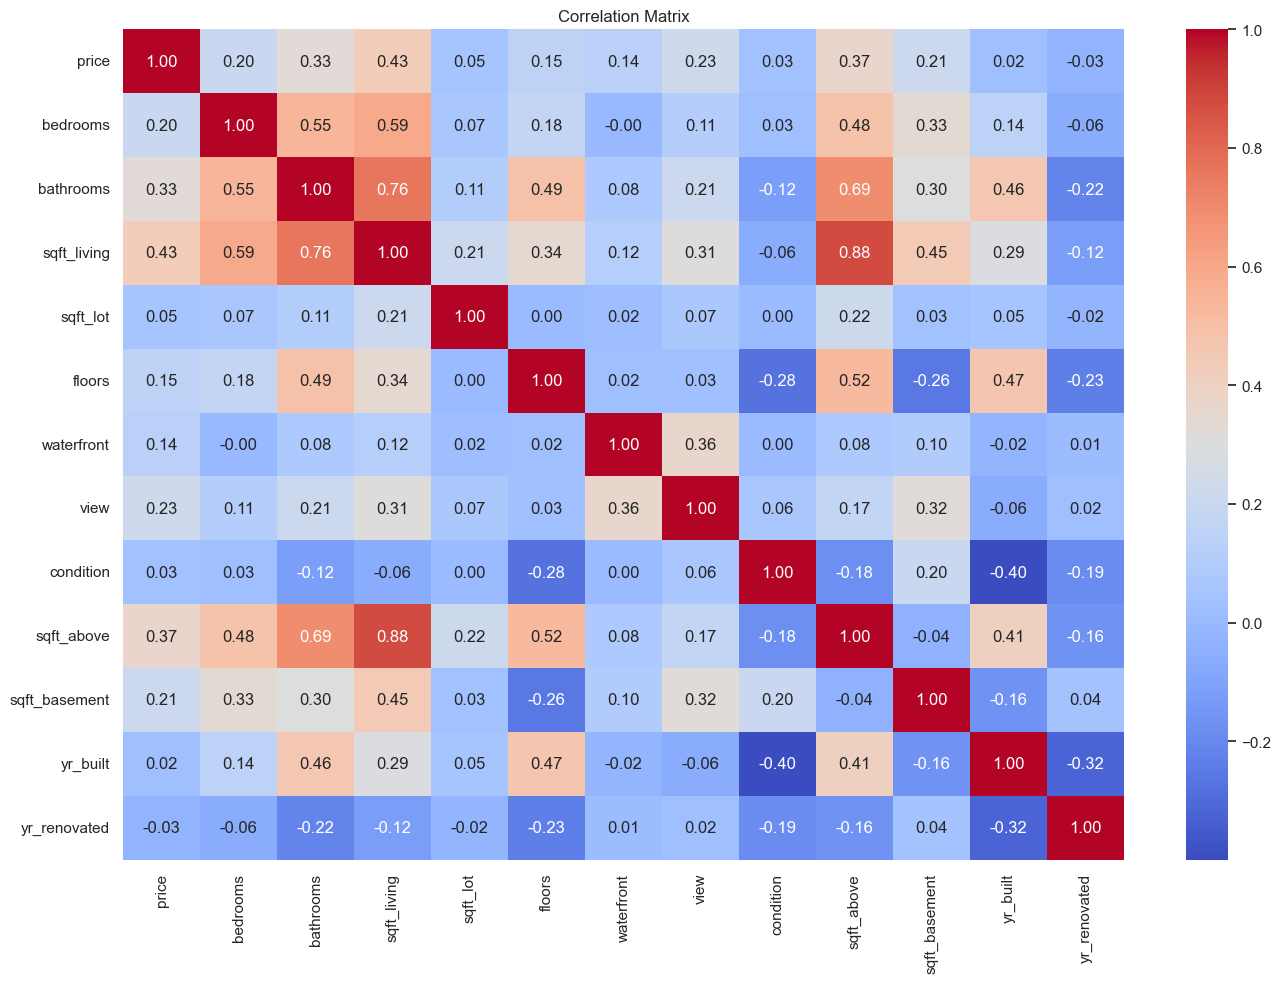

<Figure size 1500x1000 with 0 Axes>

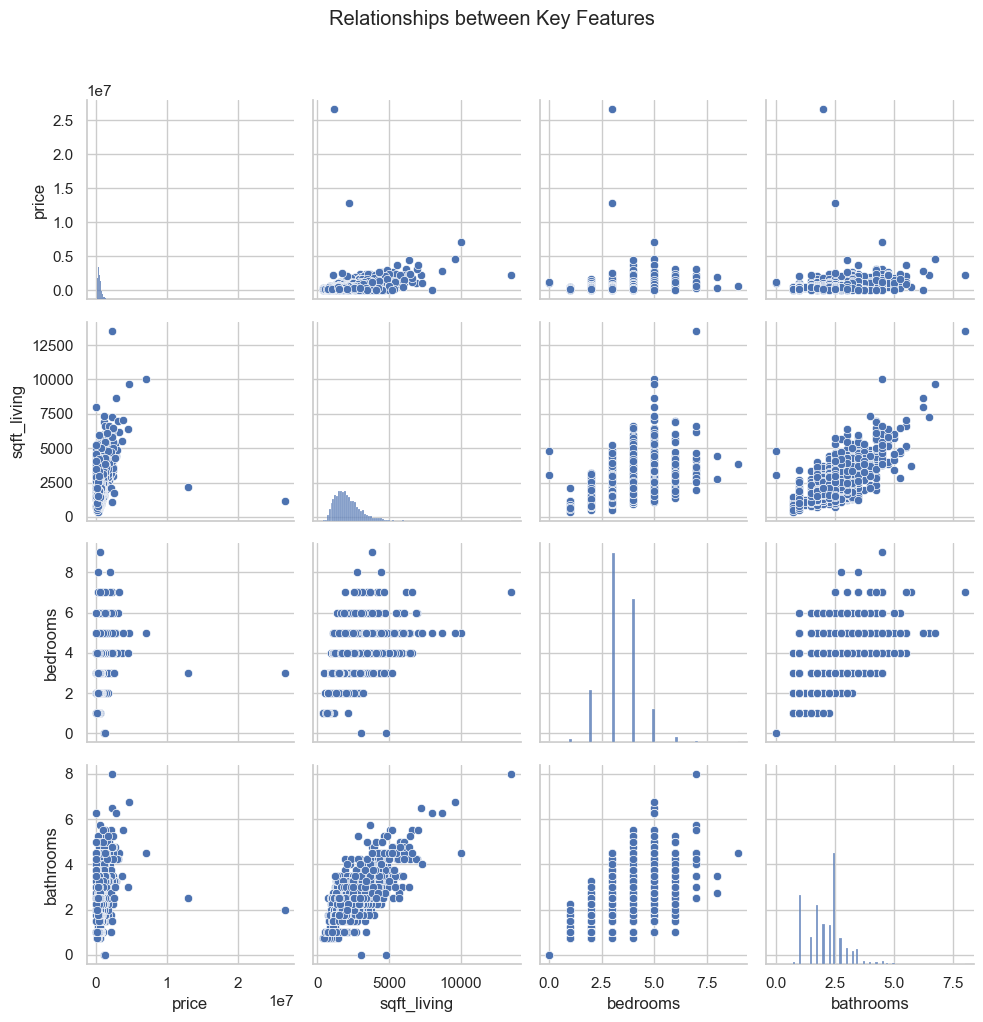

In [6]:
### 2.5 Correlation Analysis


# Correlation matrix
plt.figure(figsize=(14, 10))
correlation_matrix = data.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Relationship between important features
plt.figure(figsize=(15, 10))
scatter_features = ['price', 'sqft_living', 'bedrooms', 'bathrooms']
sns.pairplot(data[scatter_features])
plt.suptitle('Relationships between Key Features', y=1.02)
plt.tight_layout()
plt.show()

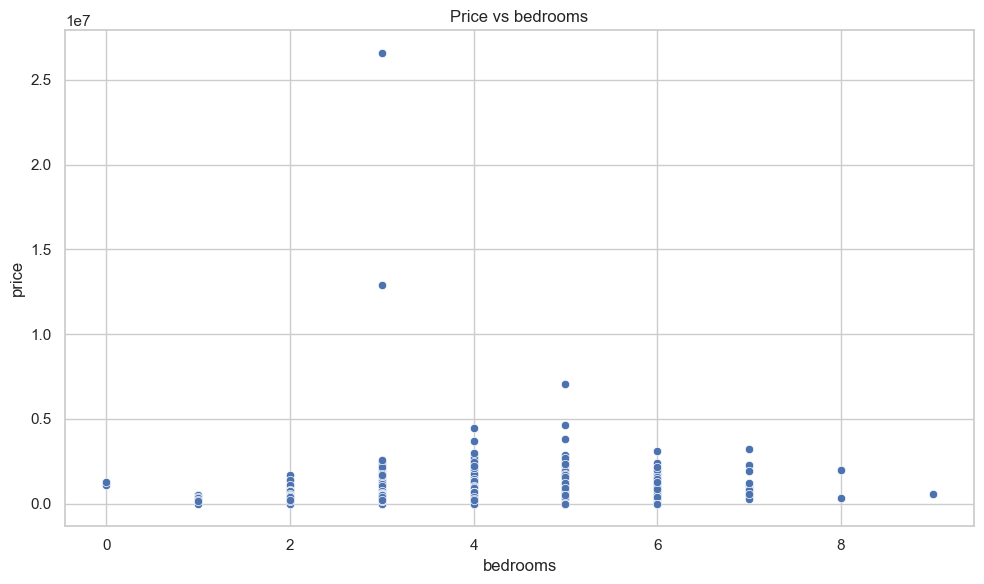

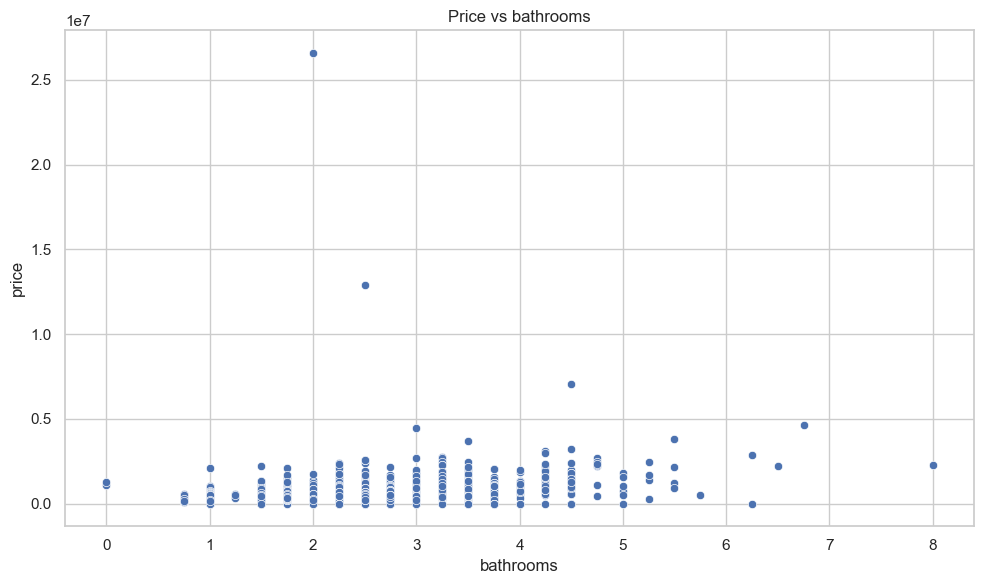

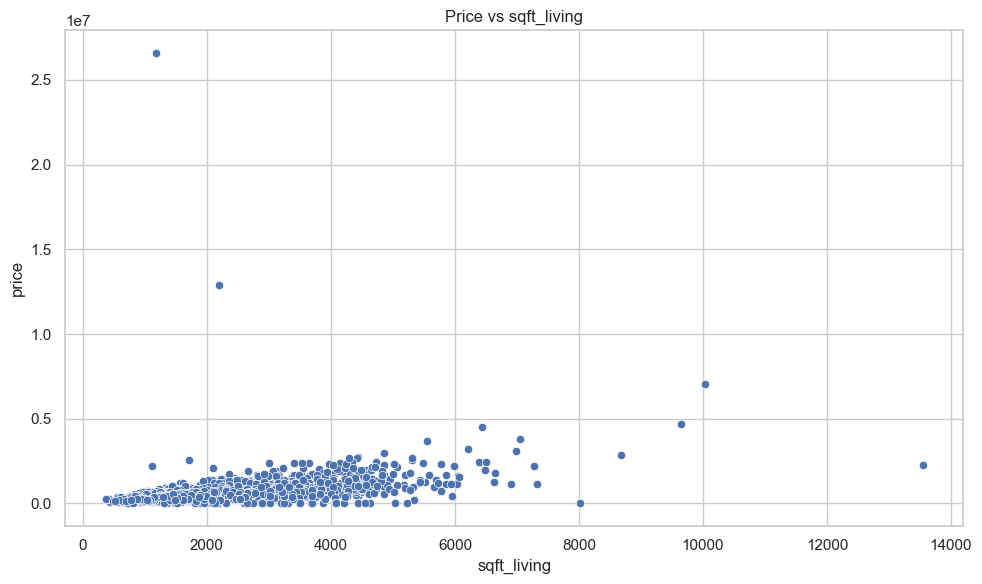

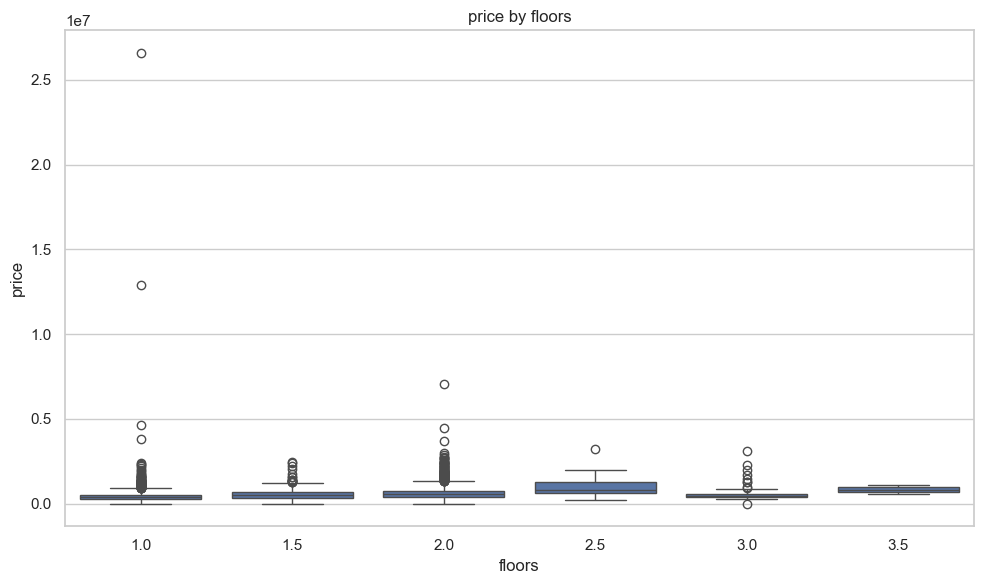

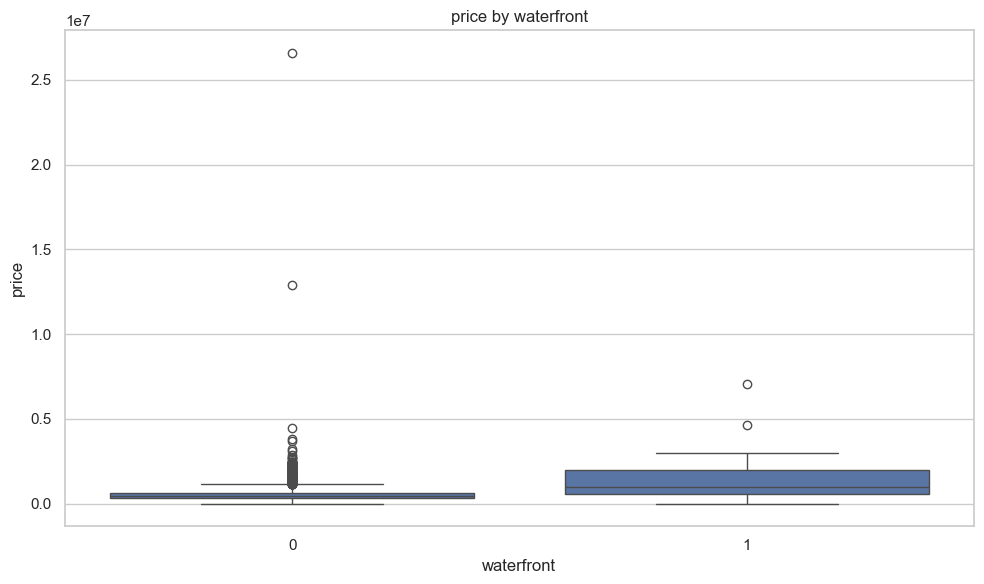

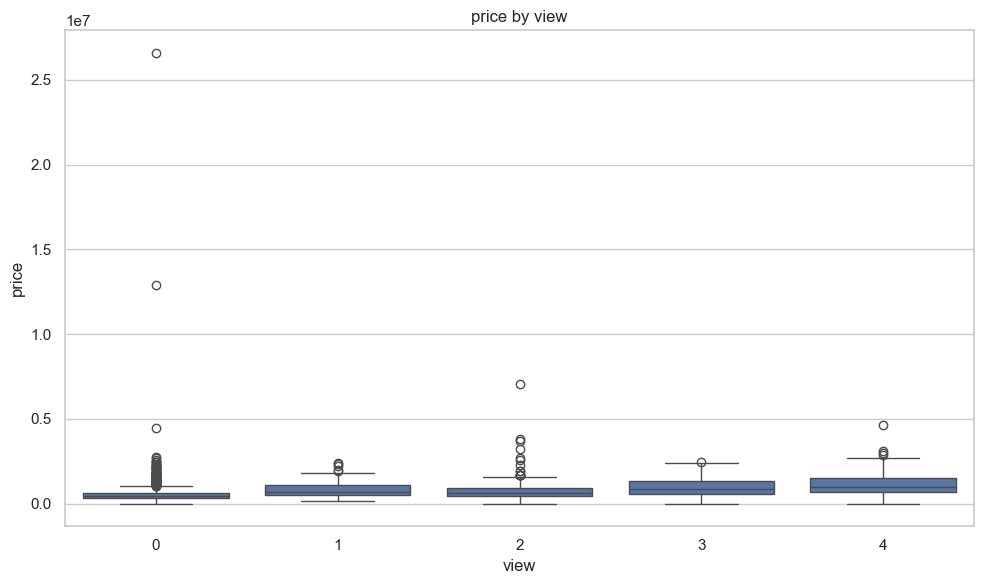

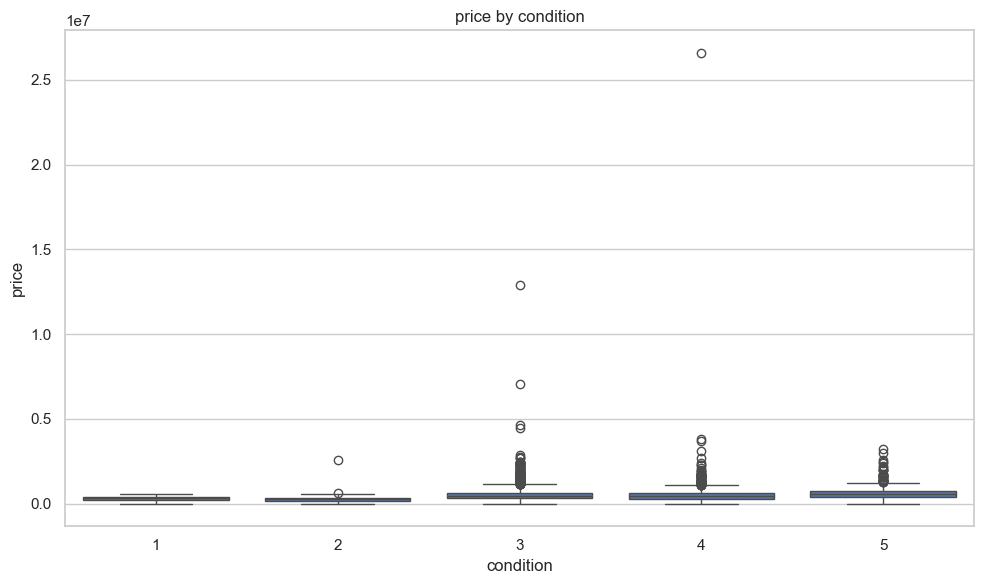

In [7]:
### 2.6 Price Relationships

# Price vs. other important features
price_features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition']

for feature in price_features:
    plt.figure(figsize=(10, 6))
    
    if data[feature].nunique() < 10:  # Categorical feature
        sns.boxplot(x=feature, y='price', data=data)
        plt.title(f'price by {feature}')
    else:  # Continuous feature
        sns.scatterplot(x=feature, y='price', data=data)
        plt.title(f'Price vs {feature}')
    
    plt.tight_layout()
    plt.show()

In [8]:
## 3. Data Cleaning and Transformation

### 3.1 Create a Copy of the Data

# Create a copy of the original data for cleaning
clean_data = data.copy()

In [9]:
### 3.2 Handle Missing Values

# Handle missing values
print("\nHandling missing values...")
for col in clean_data.columns:
    missing = clean_data[col].isnull().sum()
    if missing > 0:
        print(f"Column {col} has {missing} missing values")
        
        # Handle missing values based on data type
        if clean_data[col].dtype == 'object':
            # For categorical data, fill with mode
            clean_data[col] = clean_data[col].fillna(clean_data[col].mode()[0])
            print(f"  - Filled with mode: {clean_data[col].mode()[0]}")
        else:
            # For numerical data, fill with median
            clean_data[col] = clean_data[col].fillna(clean_data[col].median())
            print(f"  - Filled with median: {clean_data[col].median()}")

# Check if any missing values remain
print("\nRemaining missing values after handling:")
print(clean_data.isnull().sum().sum())


Handling missing values...

Remaining missing values after handling:
0


In [10]:
### 3.3 Fix Data Types

# Fix data types
print("\nFix data types...")

# Convert Date to datetime if it's not already
if 'date' in clean_data.columns:
    try:
        clean_data['date'] = pd.to_datetime(clean_data['date'], errors='coerce')
        print("Date column converted to datetime format")
    except:
        print("Could not convert Date column to datetime format")


Fix data types...
Date column converted to datetime format


In [11]:
### 3.4 Handle Outliers

# Handle outliers
print("\nHandling outliers...")

# Select columns to handle outliers (price and area measurements)
outlier_cols = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

for col in outlier_cols:
    Q1 = clean_data[col].quantile(0.25)
    Q3 = clean_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = clean_data[(clean_data[col] < lower_bound) | (clean_data[col] > upper_bound)]
    print(f"Column {col}: found {len(outliers)} outliers")
    
    # Clip outliers to the lower and upper bounds
    clean_data[col] = clean_data[col].clip(lower=lower_bound, upper=upper_bound)
    print(f"  - Clipped outliers to range [{lower_bound:.2f}, {upper_bound:.2f}]")

print(f"\nData shape after handling outliers: {clean_data.shape}")


Handling outliers...
Column price: found 240 outliers
  - Clipped outliers to range [-175256.25, 1153093.75]
Column sqft_living: found 129 outliers
  - Clipped outliers to range [-280.00, 4360.00]
Column sqft_lot: found 541 outliers
  - Clipped outliers to range [-4000.00, 20002.00]
Column sqft_above: found 116 outliers
  - Clipped outliers to range [-475.00, 3965.00]
Column sqft_basement: found 82 outliers
  - Clipped outliers to range [-915.00, 1525.00]

Data shape after handling outliers: (4600, 18)


In [12]:
### 3.5 Feature Encoding and Transformation

# Transform categorical features
print("\nFeature encoding and transformation...")

categorical_features = ['waterfront', 'view', 'condition', 'city', 'state_zip']

# Process each categorical feature
for col in categorical_features:
    if col in clean_data.columns:
        # For binary features (like Waterfront) just make sure they're numeric
        if clean_data[col].nunique() == 2:
            clean_data[col] = clean_data[col].astype(int)
            print(f"Converted {col} to binary numeric")
        
        # For categorical features with fewer categories, create dummy variables
        elif clean_data[col].nunique() < 10:
            dummies = pd.get_dummies(clean_data[col], prefix=col, drop_first=True)
            clean_data = pd.concat([clean_data, dummies], axis=1)
            print(f"Created dummy variables for {col}")
        
        # For high-cardinality categorical features, handle differently
        else:
            print(f"High cardinality feature {col} with {clean_data[col].nunique()} unique values")
            if col == 'city':
                # Group less frequent cities into "Other"
                top_cities = clean_data[col].value_counts().nlargest(5).index.tolist()
                clean_data[col] = clean_data[col].apply(lambda x: x if x in top_cities else 'Other')
                dummies = pd.get_dummies(clean_data[col], prefix=col, drop_first=True)
                clean_data = pd.concat([clean_data, dummies], axis=1)
                print(f"Grouped less frequent values in {col} and created dummy variables")
            elif col == 'statezip':
                # Extract state and zip code
                if isinstance(clean_data[col].iloc[0], str) and '-' in clean_data[col].iloc[0]:
                    clean_data['State'] = clean_data[col].str.split('-').str[0]
                    clean_data['Zip'] = clean_data[col].str.split('-').str[1]
                    print(f"Split {col} into State and Zip")
                    
                    # Create dummy variables for State
                    state_dummies = pd.get_dummies(clean_data['State'], prefix='State', drop_first=True)
                    clean_data = pd.concat([clean_data, state_dummies], axis=1)
                    print(f"Created dummy variables for State")


Feature encoding and transformation...
Converted waterfront to binary numeric
Created dummy variables for view
Created dummy variables for condition
High cardinality feature city with 44 unique values
Grouped less frequent values in city and created dummy variables


In [13]:
### 3.6 Feature Engineering

# Feature engineering
print("\nFeature engineering...")

# Extract month and year from Date
if 'date' in clean_data.columns and pd.api.types.is_datetime64_any_dtype(clean_data['date']):
    clean_data['Month'] = clean_data['date'].dt.month
    clean_data['Year'] = clean_data['date'].dt.year
    print("Extracted Month and Year from Date")

# Calculate house age and years since renovation
current_year = 2014  # Since the data is from 2014
if 'yr_built' in clean_data.columns:
    clean_data['House_Age'] = current_year - clean_data['yr_built']
    print("Created House_Age feature")

if 'yr_renovated' in clean_data.columns:
    # Replace 0 with the year built (meaning not renovated)
    clean_data['yr_renovated'] = clean_data.apply(
        lambda row: row['yr_built'] if row['yr_renovated'] == 0 else row['yr_renovated'], 
        axis=1
    )
    clean_data['Years_Since_Renovation'] = current_year - clean_data['yr_renovated']
    print("Created Years_Since_Renovation feature")

# Total square footage (living + lot)
if 'sqft_living' in clean_data.columns and 'sqft_lot' in clean_data.columns:
    clean_data['Total_Sqft'] = clean_data['sqft_living'] + clean_data['sqft_lot']
    print("Created Total_Sqft feature")

# Living area ratio (living area / total area)
if 'sqft_living' in clean_data.columns and 'sqft_lot' in clean_data.columns:
    clean_data['Living_Area_Ratio'] = clean_data['sqft_living'] / clean_data['sqft_lot']
    # Replace infinities and NaNs with 0
    clean_data['Living_Area_Ratio'] = clean_data['Living_Area_Ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)
    print("Created Living_Area_Ratio feature")

# Bathrooms per bedroom
if 'bathrooms' in clean_data.columns and 'bedrooms' in clean_data.columns:
    clean_data['Bath_Per_Bed'] = clean_data['bathrooms'] / clean_data['bedrooms']
    # Replace infinities and NaNs with 0
    clean_data['Bath_Per_Bed'] = clean_data['Bath_Per_Bed'].replace([np.inf, -np.inf], np.nan).fillna(0)
    print("Created Bath_Per_Bed feature")

# Sqft per bedroom
if 'sqft_living' in clean_data.columns and 'bedrooms' in clean_data.columns:
    clean_data['Sqft_Per_Bed'] = clean_data['sqft_living'] / clean_data['bedrooms']
    # Replace infinities and NaNs with 0
    clean_data['Sqft_Per_Bed'] = clean_data['Sqft_Per_Bed'].replace([np.inf, -np.inf], np.nan).fillna(0)
    print("Created Sqft_Per_Bed feature")

# Basement presence
if 'Sqft-basement' in clean_data.columns:
    clean_data['Has_Basement'] = (clean_data['Sqft-basement'] > 0).astype(int)
    print("Created Has_Basement feature")

# Price per sqft
if 'price' in clean_data.columns and 'sqft_living' in clean_data.columns:
    clean_data['Price_Per_Sqft'] = clean_data['price'] / clean_data['sqft_living']
    # Replace infinities and NaNs with 0
    clean_data['Price_Per_Sqft'] = clean_data['Price_Per_Sqft'].replace([np.inf, -np.inf], np.nan).fillna(0)
    print("Created Price_Per_Sqft feature")


Feature engineering...
Extracted Month and Year from Date
Created House_Age feature
Created Years_Since_Renovation feature
Created Total_Sqft feature
Created Living_Area_Ratio feature
Created Bath_Per_Bed feature
Created Sqft_Per_Bed feature
Created Price_Per_Sqft feature


In [14]:
### 3.7 Log Transform Skewed Features

# Apply log transformation to skewed features
print("\nApplying log transformation to skewed features...")

# Calculate skewness for numeric columns
numeric_cols = clean_data.select_dtypes(include=['int64', 'float64']).columns
skewed_feats = clean_data[numeric_cols].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
skew_threshold = 0.5
skewed_feats = skewed_feats[abs(skewed_feats) > skew_threshold]

print(f"Skewed features above threshold {skew_threshold}:")
print(skewed_feats)

# Apply log transformation to skewed features
for col in skewed_feats.index:
    if col in clean_data.columns and clean_data[col].min() > 0:  # Can only log transform positive values
        clean_data[f"{col}_Log"] = np.log1p(clean_data[col])
        print(f"Log-transformed {col}")


Applying log transformation to skewed features...
Skewed features above threshold 0.5:
waterfront                11.679091
view                       3.340497
Living_Area_Ratio          2.185154
Years_Since_Renovation     1.352741
sqft_basement              1.178651
Sqft_Per_Bed               1.047866
condition                  0.958755
Price_Per_Sqft             0.937583
sqft_above                 0.923151
sqft_lot                   0.868799
Total_Sqft                 0.845623
price                      0.834182
Bath_Per_Bed               0.797199
sqft_living                0.725917
bathrooms                  0.615832
floors                     0.551261
House_Age                  0.501991
yr_built                  -0.501991
yr_renovated              -1.352741
dtype: float64
Log-transformed Living_Area_Ratio
Log-transformed condition
Log-transformed sqft_above
Log-transformed sqft_lot
Log-transformed Total_Sqft
Log-transformed sqft_living
Log-transformed floors
Log-transformed yr_buil

In [15]:
### 3.8 Drop Unnecessary Columns

# Drop unnecessary columns
print("\nDropping unnecessary columns...")

# Columns that have been transformed or are no longer needed
columns_to_drop = []

# Original categorical columns that were one-hot encoded
for col in categorical_features:
    if col in clean_data.columns and col not in ['waterfront', 'view', 'condition']:
        columns_to_drop.append(col)

# Street can be dropped as it's too specific
if 'Street' in clean_data.columns:
    columns_to_drop.append('Street')

# State-zip was split into State and Zip
if 'State-zip' in clean_data.columns and 'State' in clean_data.columns:
    columns_to_drop.append('State-zip')

print(f"Columns to drop: {columns_to_drop}")
if columns_to_drop:
    clean_data = clean_data.drop(columns=columns_to_drop)
    print(f"Dropped {len(columns_to_drop)} columns")



Dropping unnecessary columns...
Columns to drop: ['city']
Dropped 1 columns


In [16]:
### 3.9 Final Data Quality Check

# Final data quality check
print("\nFinal data quality check...")

# Check for missing values
print("Missing values:")
print(clean_data.isnull().sum().sum())

# Check data types
print("\nData types:")
print(clean_data.dtypes)

# Basic statistics
print("\nBasic statistics:")
print(clean_data.describe())

# Final data shape
print(f"\nFinal data shape: {clean_data.shape}")


Final data quality check...
Missing values:
0

Data types:
date                      datetime64[ns]
price                            float64
bedrooms                           int64
bathrooms                        float64
sqft_living                        int64
sqft_lot                           int64
floors                           float64
waterfront                         int64
view                               int64
condition                          int64
sqft_above                         int64
sqft_basement                      int64
yr_built                           int64
yr_renovated                       int64
street                            object
statezip                          object
country                           object
view_1                              bool
view_2                              bool
view_3                              bool
view_4                              bool
condition_2                         bool
condition_3                         bo

In [17]:
## 4. Save Cleaned Data

# Save the cleaned data
print("\nSaving cleaned data...")
clean_data.to_csv('cleaned_agency_data.csv', index=False)
print("Data saved to cleaned_agency_data.csv")


Saving cleaned data...
Data saved to cleaned_agency_data.csv



Visualization of cleaned data...


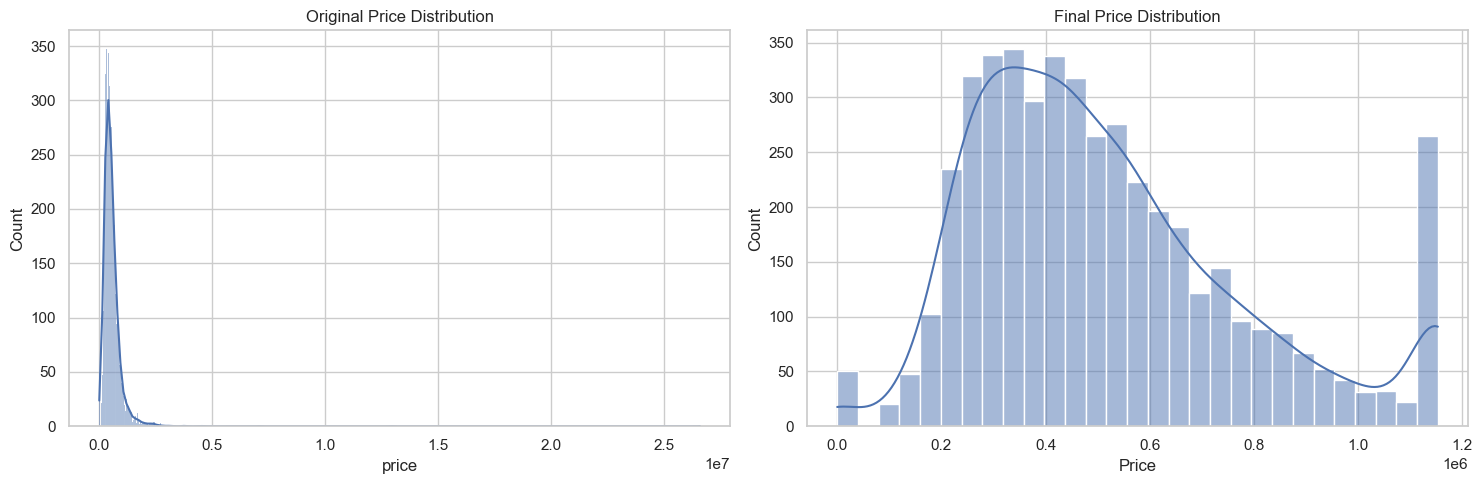

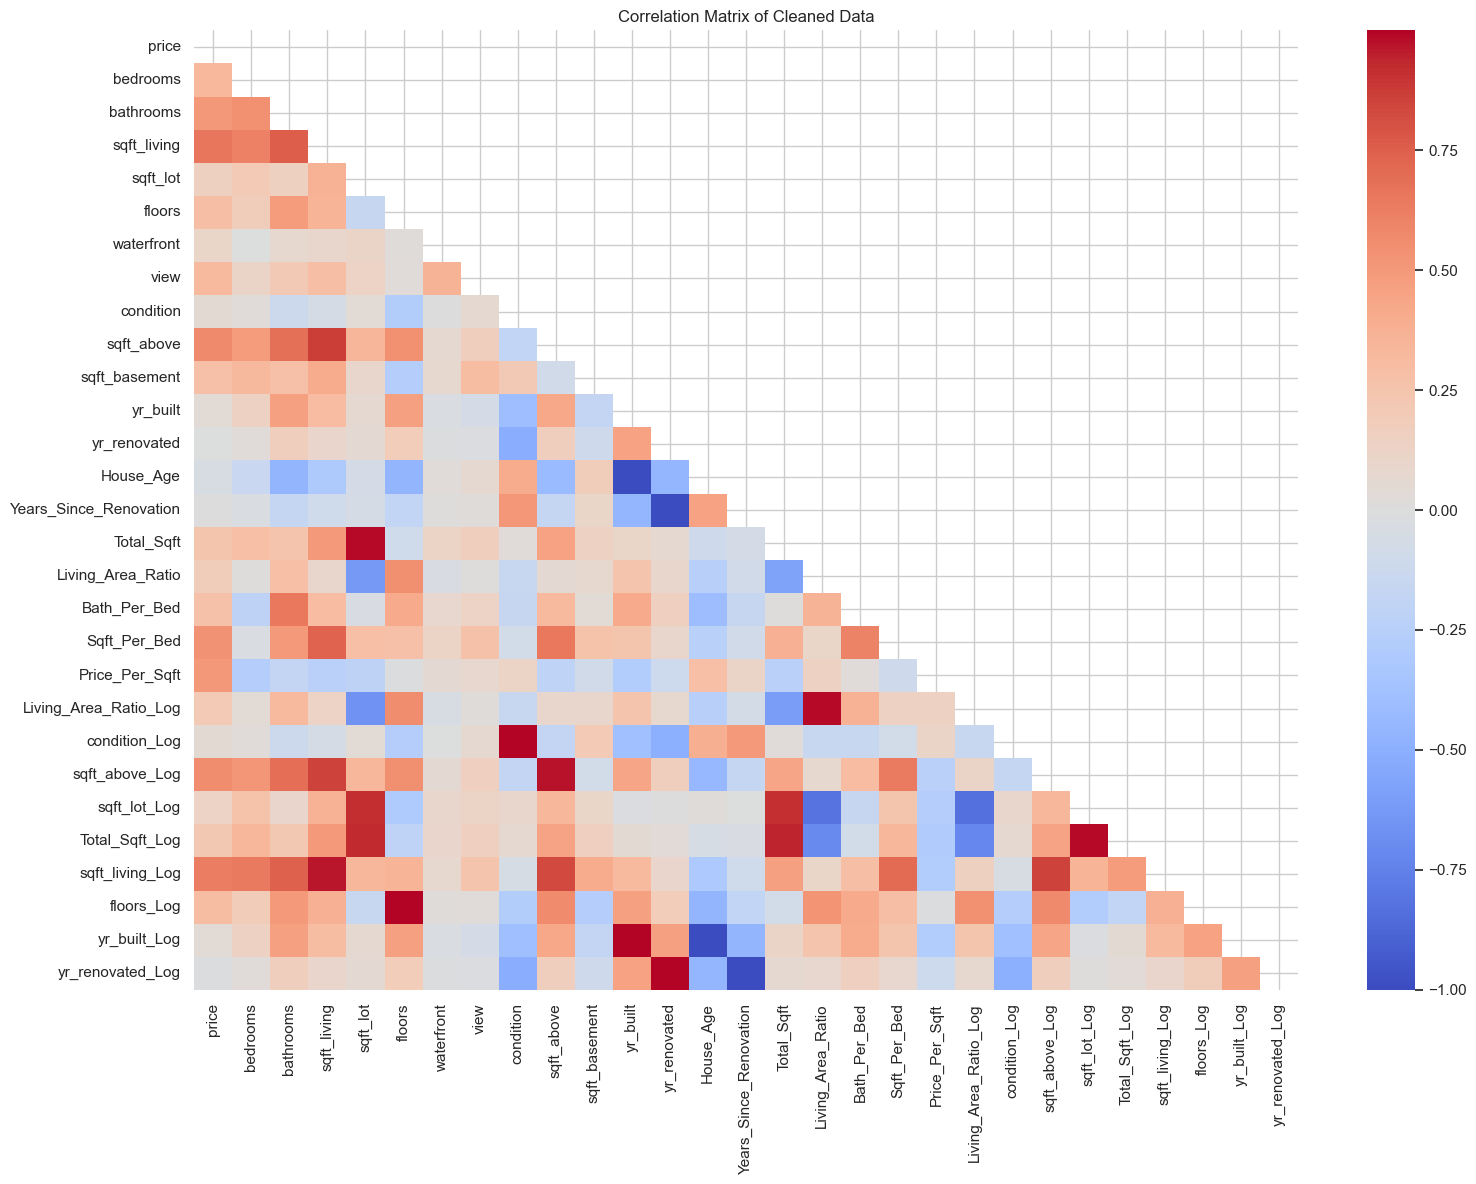


Top 10 features most correlated with price:
price              1.000000
sqft_living        0.663015
sqft_living_Log    0.630047
sqft_above         0.572611
sqft_above_Log     0.555234
Sqft_Per_Bed       0.536046
bathrooms          0.506386
Price_Per_Sqft     0.500775
bedrooms           0.330935
view               0.315862
floors_Log         0.300350
Name: price, dtype: float64


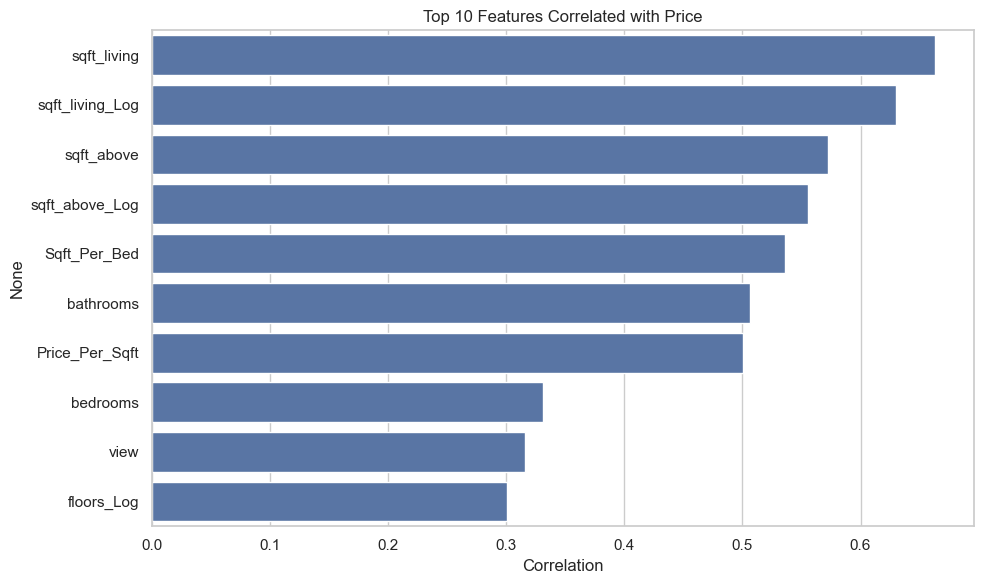

In [18]:
## 5. Final Visualizations

# Visualization of cleaned data
print("\nVisualization of cleaned data...")

# Distribution of target variable (Price) before and after transformation
plt.figure(figsize=(15, 5))

# Original price distribution
plt.subplot(1, 2, 1)
sns.histplot(data['price'], kde=True)
plt.title('Original Price Distribution')
plt.xlabel('price')

# Log-transformed price distribution (if it was transformed)
if 'Prix_Log' in clean_data.columns:
    plt.subplot(1, 2, 2)
    sns.histplot(clean_data['Prix_Log'], kde=True)
    plt.title('Log-Transformed Price Distribution')
    plt.xlabel('Log(Price)')
else:
    plt.subplot(1, 2, 2)
    sns.histplot(clean_data['price'], kde=True)
    plt.title('Final Price Distribution')
    plt.xlabel('Price')

plt.tight_layout()
plt.show()

# Correlation matrix of cleaned data
plt.figure(figsize=(16, 12))
correlation_matrix = clean_data.select_dtypes(include=['int64', 'float64']).corr()
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=False, mask=mask, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Cleaned Data')
plt.tight_layout()
plt.show()

# Top 10 most correlated features with price
price_corr = correlation_matrix['price'].sort_values(ascending=False)
top_corr = price_corr.head(11)  # Including price itself which will be 1.0
print("\nTop 10 features most correlated with price:")
print(top_corr)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.values[1:], y=top_corr.index[1:])  # Exclude price itself
plt.title('Top 10 Features Correlated with Price')
plt.xlabel('Correlation')
plt.tight_layout()
plt.show()

In [19]:
print(data.columns)

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')


In [20]:
print(categorical_cols)

['street', 'city', 'statezip', 'country', 'waterfront', 'view', 'condition']
